In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Fake_Real_Data.csv')

In [8]:
import spacy
spcy = spacy.load('en_core_web_lg')

In [3]:
df

,Text,label
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake
1,U.S. conservative leader optimistic of common ...,Real
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real
3,Court Forces Ohio To Allow Millions Of Illega...,Fake
4,Democrats say Trump agrees to work on immigrat...,Real
...,...,...
9895,Wikileaks Admits To Screwing Up IMMENSELY Wit...,Fake
9896,Trump consults Republican senators on Fed chie...,Real
9897,Trump lawyers say judge lacks jurisdiction for...,Real
9898,WATCH: Right-Wing Pastor Falsely Credits Trum...,Fake


In [5]:
df['label_num'] = df['label'].map({'Fake':0,'Real':1})

In [6]:
df

,Text,label,label_num
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake,0
1,U.S. conservative leader optimistic of common ...,Real,1
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real,1
3,Court Forces Ohio To Allow Millions Of Illega...,Fake,0
4,Democrats say Trump agrees to work on immigrat...,Real,1
...,...,...,...
9895,Wikileaks Admits To Screwing Up IMMENSELY Wit...,Fake,0
9896,Trump consults Republican senators on Fed chie...,Real,1
9897,Trump lawyers say judge lacks jurisdiction for...,Real,1
9898,WATCH: Right-Wing Pastor Falsely Credits Trum...,Fake,0


In [9]:
df['vector'] = df['Text'].apply(lambda text : spcy(text).vector)

In [10]:
df

,Text,label,label_num,vector
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake,0,"[-0.6759837, 1.4263071, -2.318466, -0.451093, ..."
1,U.S. conservative leader optimistic of common ...,Real,1,"[-1.8355803, 1.3101058, -2.4919677, 1.0268308,..."
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real,1,"[-1.9851209, 0.14389805, -2.4221718, 0.9133005..."
3,Court Forces Ohio To Allow Millions Of Illega...,Fake,0,"[-2.7812982, -0.16120885, -1.609772, 1.3624227..."
4,Democrats say Trump agrees to work on immigrat...,Real,1,"[-2.2010763, 0.9961637, -2.4088492, 1.128273, ..."
...,...,...,...,...
9895,Wikileaks Admits To Screwing Up IMMENSELY Wit...,Fake,0,"[-1.6682401, 0.78006977, -2.2337353, -0.159771..."
9896,Trump consults Republican senators on Fed chie...,Real,1,"[-1.9297235, 0.8007302, -1.8990824, 0.42668718..."
9897,Trump lawyers say judge lacks jurisdiction for...,Real,1,"[-1.5289013, 1.0250993, -1.9861357, 0.4278564,..."
9898,WATCH: Right-Wing Pastor Falsely Credits Trum...,Fake,0,"[-1.3928099, 0.7792715, -2.2072845, 0.13192406..."


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.vector.values,
    df.label_num,
    test_size=0.2,
    random_state=2022
)

In [12]:
import numpy as np

X_train_2d = np.stack(X_train)
X_test_2d = np.stack(X_test)

In [13]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()
scaled_train_embed = scaler.fit_transform(X_train_2d)
scaled_test_embed = scaler.transform(X_test_2d)


clf = MultinomialNB()
clf.fit(scaled_train_embed, y_train)

MultinomialNB()

In [16]:
from sklearn.metrics import classification_report
y_pred = clf.predict(scaled_test_embed)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95      1024
           1       0.94      0.95      0.94       956

    accuracy                           0.94      1980
   macro avg       0.94      0.94      0.94      1980
weighted avg       0.94      0.94      0.94      1980



Text(95.72222222222221, 0.5, 'Truth')

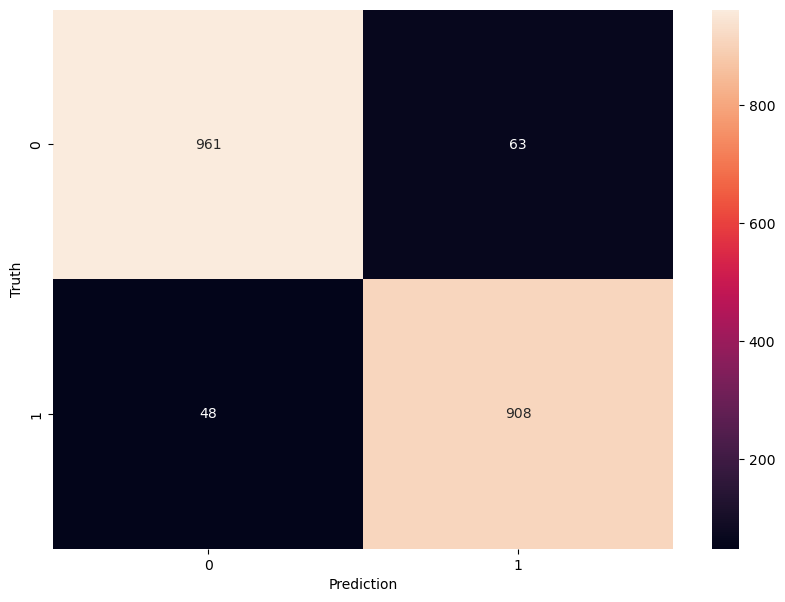

In [15]:
#finally print the confusion matrix for the best model
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')